<a href="https://colab.research.google.com/github/ketanchejara/DeepLearning/blob/main/maskdetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extract dataset using kaggle

# New Section

In [4]:
!pip install kaggle

In [10]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Import Data

In [14]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 72% 117M/163M [00:00<00:00, 1.22GB/s]
100% 163M/163M [00:00<00:00, 837MB/s] 


In [15]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [16]:
!ls

 data			'kaggle (1).json'	 kaggle.json
 face-mask-dataset.zip	 kagglecatsanddogs.zip	 sample_data


Importing the Dependencies

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [18]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2866.jpg', 'with_mask_985.jpg', 'with_mask_755.jpg', 'with_mask_2287.jpg', 'with_mask_2735.jpg']
['with_mask_3004.jpg', 'with_mask_2103.jpg', 'with_mask_2036.jpg', 'with_mask_668.jpg', 'with_mask_266.jpg']


In [20]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1435.jpg', 'without_mask_247.jpg', 'without_mask_1935.jpg', 'without_mask_3808.jpg', 'without_mask_3434.jpg']
['without_mask_464.jpg', 'without_mask_2586.jpg', 'without_mask_1975.jpg', 'without_mask_3344.jpg', 'without_mask_1580.jpg']


In [21]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [26]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [27]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [28]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [25]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


displaying Image

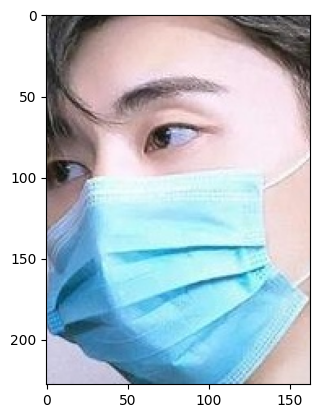

In [29]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

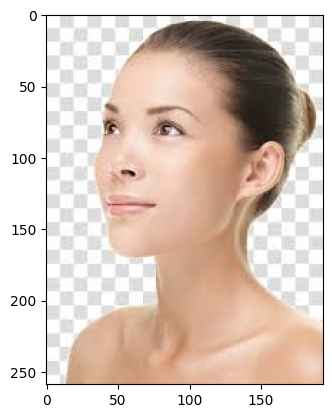

In [30]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the Images

Convert the images to numpy arrays

In [32]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [33]:
type(data)

list

In [34]:
len(data)

7553

array([[[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [155, 155, 155],
        [154, 154, 154],
        [154, 154, 154]],

       [[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [155, 155, 155],
        [154, 154, 154],
        [154, 154, 154]],

       [[148, 148, 148],
        [148, 148, 148],
        [148, 148, 148],
        ...,
        [155, 155, 155],
        [154, 154, 154],
        [154, 154, 154]],

       ...,

       [[130, 130, 130],
        [130, 130, 130],
        [130, 130, 130],
        ...,
        [146, 146, 146],
        [147, 147, 147],
        [146, 146, 146]],

       [[129, 129, 129],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [145, 145, 145],
        [146, 146, 146],
        [145, 145, 145]],

       [[129, 129, 129],
        [129, 129, 129],
        [129, 129, 129],
        ...,
        [144, 144, 144],
        [145, 145, 145],
        [144, 144, 144]]], dtype=uint8)
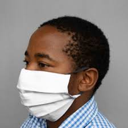

In [35]:
data[0]

In [36]:
type(data[0])

numpy.ndarray

In [37]:
data[0].shape

(128, 128, 3)

In [38]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [39]:
type(X)

numpy.ndarray

In [40]:
type(Y)

numpy.ndarray

In [41]:

print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [42]:
print(Y)

[1 1 1 ... 0 0 0]


train test split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [45]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [199, 199, 200],
        [197, 198, 200],
        [199, 199, 201]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [198, 198, 198],
        [199, 199, 201],
        [199, 199, 201]],

       [[214, 214, 214],
        [214, 214, 214],
        [214, 214, 214],
        ...,
        [207, 205, 203],
        [199, 198, 199],
        [199, 199, 201]],

       ...,

       [[171, 171, 171],
        [171, 171, 171],
        [173, 173, 173],
        ...,
        [213, 185, 181],
        [209, 180, 173],
        [209, 182, 171]],

       [[172, 169, 170],
        [173, 169, 170],
        [173, 171, 171],
        ...,
        [210, 187, 183],
        [209, 181, 175],
        [207, 180, 169]],

       [[172, 166, 168],
        [172, 167, 169],
        [174, 169, 170],
        ...,
        [216, 201, 197],
        [206, 182, 175],
        [206, 179, 168]]], dtype=uint8)
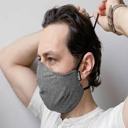

In [46]:
X_train[0]

In [47]:
X_train_scaled[0]

array([[[0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        ...,
        [0.78039216, 0.78039216, 0.78431373],
        [0.77254902, 0.77647059, 0.78431373],
        [0.78039216, 0.78039216, 0.78823529]],

       [[0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        ...,
        [0.77647059, 0.77647059, 0.77647059],
        [0.78039216, 0.78039216, 0.78823529],
        [0.78039216, 0.78039216, 0.78823529]],

       [[0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        [0.83921569, 0.83921569, 0.83921569],
        ...,
        [0.81176471, 0.80392157, 0.79607843],
        [0.78039216, 0.77647059, 0.78039216],
        [0.78039216, 0.78039216, 0.78823529]],

       ...,

       [[0.67058824, 0.67058824, 0.67058824],
        [0.67058824, 0.67058824, 0.67058824],
        [0.67843137, 0

building a CNN

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [51]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 811ms/step - acc: 0.6835 - loss: 0.7038 - val_acc: 0.8926 - val_loss: 0.2650
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 135s 774ms/step - acc: 0.8760 - loss: 0.3057 - val_acc: 0.8909 - val_loss: 0.2425
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 145s 796ms/step - acc: 0.9041 - loss: 0.2386 - val_acc: 0.9058 - val_loss: 0.2356
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 132s 771ms/step - acc: 0.9213 - loss: 0.1989 - val_acc: 0.8959 - val_loss: 0.2250
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 147s 799ms/step - acc: 0.9344 - loss: 0.1649 - val_acc: 0.8760 - val_loss: 0.2860


In [52]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - acc: 0.8753 - loss: 0.3155
Test Accuracy = 0.8735936284065247


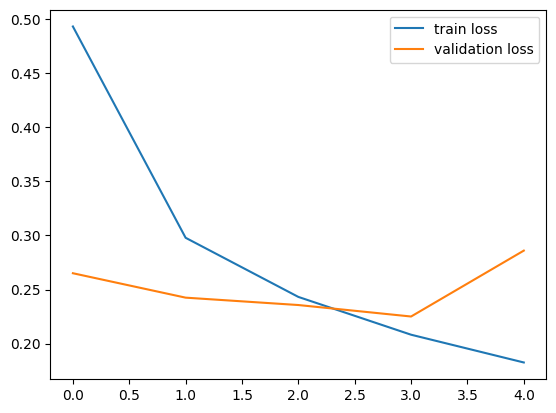

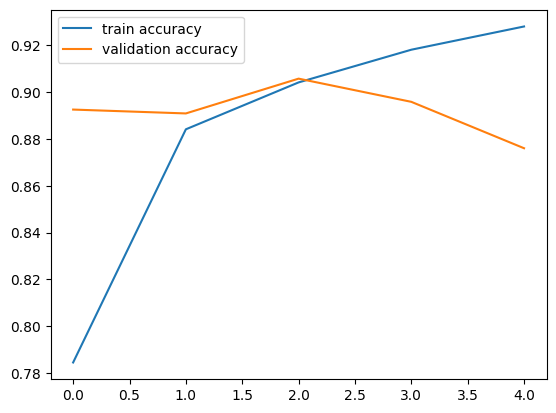

In [53]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/download.png


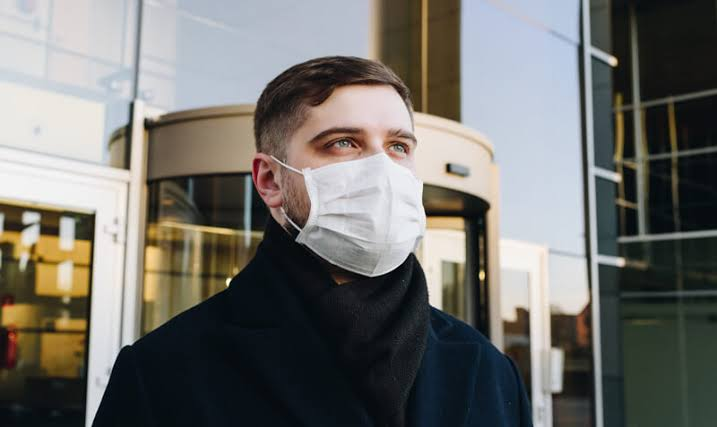

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[0.09928599 0.7346922 ]]
1
The person in the image is wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/download (1).png


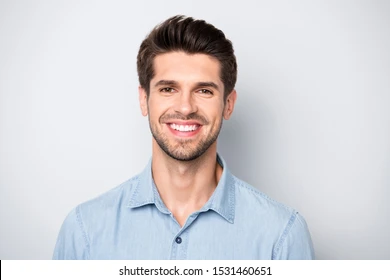

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.20037448 0.64922357]]
1
The person in the image is wearing a mask


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')